In [1]:
%pip install grip
%pip install supyr-struct

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached Markdown-3.6-py3-none-any.whl.metadata (7.0 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/138.5 kB ? eta -:

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


   ---------------------------------------- 0.0/236.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/236.5 kB ? eta -:--:--
   ---------------------------------------- 0.0/236.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/236.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/236.5 kB ? eta -:--:--
   - -------------------------------------- 10.2/236.5 kB ? eta -:--:--
   ----- --------------------------------- 30.7/236.5 kB 145.2 kB/s eta 0:00:02
   ---------- ---------------------------- 61.4/236.5 kB 233.8 kB/s eta 0:00:01
   --------------- ----------------------- 92.2/236.5 kB 308.0 kB/s eta 0:00:01
   ----------------------- -------------- 143.4/236.5 kB 425.3 kB/s eta 0:00:01
   --------------------------- ---------- 174.1/236.5 kB 455.1 kB/s eta 0:00:01
   -------------------------------------  235.5/236.5 kB 554.9 kB/s eta 0:00:01
   -------------------------------------- 236.5/236.5 kB 536.1 kB/s eta 0:00:00
Note: you m

### Descripción del Dataset

El dataset utilizado es un conjunto de imágenes en formato IDX comprimido en un archivo .gz, que contiene 60,000 imágenes en escala de grises de 28x28 píxeles. Este formato es comúnmente utilizado para datasets de imágenes en Machine Learning, como el MNIST. Las imágenes no están etiquetadas, por lo que se utilizarán técnicas de clustering para analizarlas.

¿Qué es el formato IDX y cuál es la diferencia respecto a .csv?

- Formato IDX: El formato IDX es un formato binario que se utiliza para almacenar grandes cantidades de datos de manera eficiente. Es comúnmente usado en datasets de imágenes como MNIST. Los datos se almacenan en una estructura compacta y se pueden leer rápidamente. Los archivos IDX suelen estar comprimidos en .gz para reducir el tamaño del archivo.

- Formato CSV: El formato CSV (Comma-Separated Values) es un formato de texto plano que almacena datos tabulares en forma de texto. Cada línea del archivo representa una fila de la tabla y las columnas están separadas por comas. Los archivos CSV son fáciles de leer y editar con herramientas simples, pero no son tan eficientes en términos de almacenamiento y velocidad de lectura/escritura como los archivos binarios como IDX.

#### Paso 1: Importar Librerías Necesarias y Definir Función para Leer el Archivo IDX

 En este paso se lee un archivo IDX comprimido y lo carga en un array de NumPy. La función read_idx descomprime el archivo, lee el encabezado para obtener las dimensiones del array y luego carga los datos en una estructura de array de NumPy.

In [15]:
import gzip
import struct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Ruta del archivo
file_path = 'train-images-idx3-ubyte.gz'

## Función para leer el archivo IDX
def read_idx(filename):
    with gzip.open(filename, 'rb') as f:
        # Leer el encabezado del archivo
        zero, data_type, dims = struct.unpack('>HBB', f.read(4))
        shape = tuple(struct.unpack('>I', f.read(4))[0] for d in range(dims))
        # Leer los datos del archivo
        data = np.frombuffer(f.read(), dtype=np.uint8).reshape(shape)
        return data
    
## Cargar los datos
images = read_idx(file_path)

images

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [ 83, 147, 126, ..., 145,  49,   0

Imprimimos la forma del array de imágenes, confirmando que hay 60,000 imágenes, cada una de 28x28 píxeles.

In [31]:
# Mostrar la forma de las imágenes

print(f"Shape de las imágenes: {images.shape}")

Shape de las imágenes: (60000, 28, 28)


#### Paso 3: Aplanar las Imágenes y Crear un DataFrame
 Las imágenes 2D se aplanan a una dimensión (28x28 = 784 columnas) para que cada imagen sea una fila en el DataFrame. Cada columna representa un píxel, y sus valores van de 0 a 255, representando la intensidad en escala de grises.

In [17]:
# Aplanar las imágenes para que cada imagen sea una fila
n_samples, width, height = images.shape
images_flat = images.reshape(n_samples, width * height)

# Crear un DataFrame de pandas
columns = [f'pixel{i}' for i in range(width * height)]
df_images = pd.DataFrame(images_flat, columns=columns)

# Visualizar las primeras filas del DataFrame
print(df_images.head())


   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0      32   
4       0       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...       122       255        90         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3     164  ...       255        64         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0   

#### Paso 4: Mostrar la Forma del DataFrame

Confirmamos que el DataFrame tiene 60,000 filas (imágenes) y 784 columnas (píxeles).

In [19]:
images_flat
print(f"Shape de las imágenes: {df_images.shape}")

Shape de las imágenes: (60000, 784)


### Paso 5: Normalizar los Datos
Los datos se normalizan para que los valores de los píxeles estén en el rango [0, 1] en lugar de [0, 255]. 

In [23]:
images_normalized = images_flat.astype(np.float32) / 255
images_normalized

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Paso 6: Convertir los Datos a Imágenes y Mostrar Algunas Imágenes Aleatorias


Se vuelve a convertir las imágenes a su forma original (28x28) para poder visualizarlas con matplotlib. Se seleccionan 9 imágenes aleatorias para su visualización.

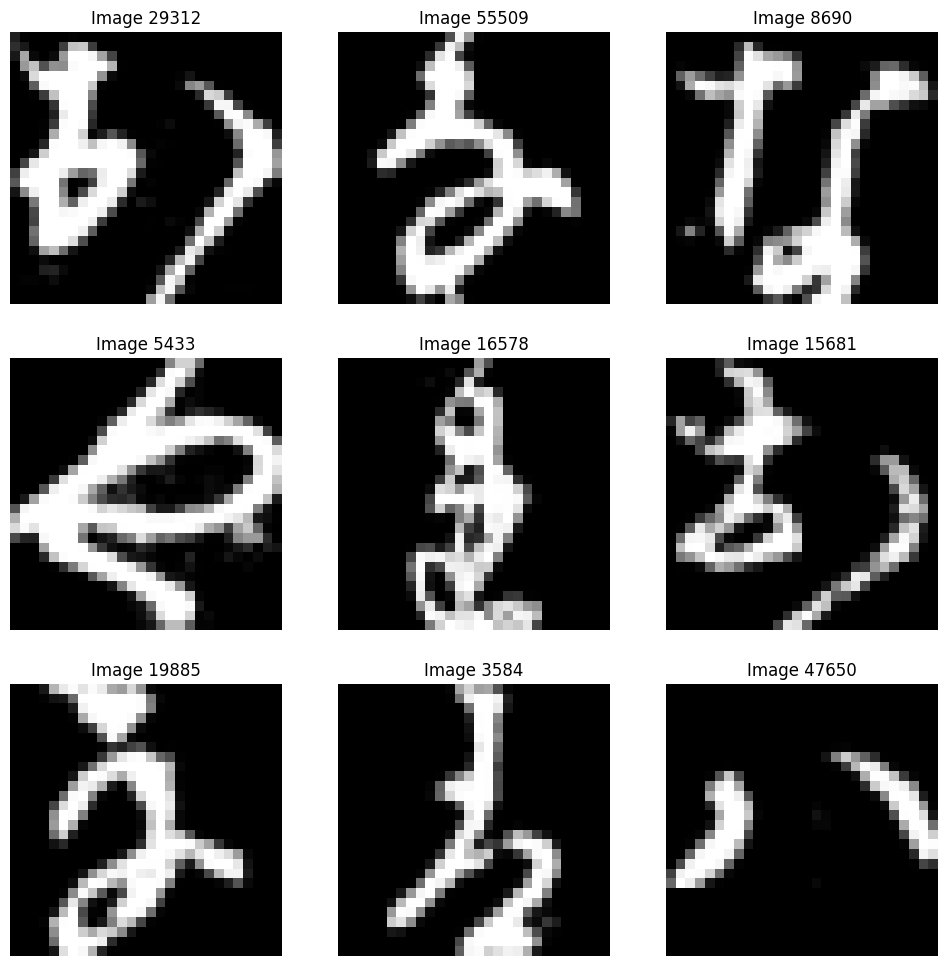

In [26]:
# Convertir los datos planos en imágenes 64x64
images_reshaped = images_normalized.reshape(-1, 28, 28)

# Índices aleatorios
random_indices = np.random.choice(len(images_reshaped), size=9, replace=False)

# Mostrar algunas imágenes aleatorias
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.imshow(images_reshaped[random_indices[i]], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Image {random_indices[i]}')

plt.show()

 #### Paso 7: Volver a Aplanar las Imágenes para Clustering

Volvemos a aplanar las imágenes para prepararlas para el clustering.

In [28]:
n_samples, width, height = images.shape
images_flat = images_reshaped.reshape(n_samples, width * height)

#### Paso 8: Calcular el Score de Silueta para Diferentes Números de Clusters

Utilizamos K-Means para realizar clustering en diferentes números de clusters (2 a 15) y calculamos el score de silueta para cada uno. El score de silueta mide la calidad del clustering. Un score más alto indica que las muestras están bien agrupadas dentro de sus clusters. Se grafica el score de silueta y se determina el número óptimo de clusters.

**Diagrama de Silueta**

**Explicación del Diagrama de Silueta:**

El diagrama de silueta es una herramienta de visualización que mide la calidad de un clustering. Cada punto en el diagrama representa una muestra y muestra qué tan cerca está del cluster vecino, comparado con su propio cluster.

- Silhouette Coefficient: El coeficiente de silueta varía entre -1 y 1. Un valor cercano a 1 indica que la muestra está bien agrupada dentro de su cluster y es distinta a los otros clusters. Un valor cercano a 0 indica que la muestra está en el límite entre dos clusters. Un valor negativo indica que la muestra podría estar mal asignada a su cluster.

- Interpretación: Un promedio de silueta más alto sugiere un mejor clustering. Sin embargo, también se debe considerar la estabilidad y consistencia de los clusters al seleccionar el número óptimo de clusters.

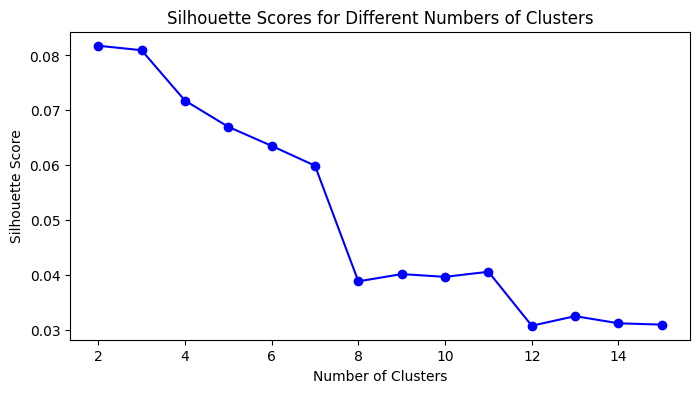

El número óptimo de clusters es: 2


In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Preparar el rango de números de clusters a evaluar
range_values = range(2, 16)
silhouette_scores = []

# Calcular el score de silueta para cada número de clusters
for k in range_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(images_normalized)
    score = silhouette_score(images_normalized, kmeans.labels_)
    silhouette_scores.append(score)

# Gráfico de los scores de silueta
plt.figure(figsize=(8, 4))
plt.plot(range_values, silhouette_scores, "bo-")
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Imprimir el número óptimo de clusters
optimal_clusters = range_values[silhouette_scores.index(max(silhouette_scores))]
print(f'El número óptimo de clusters es: {optimal_clusters}')


#### Paso 9: Visualización de los Diagramas de Silueta
Después de encontrar el número óptimo de clusters, podemos visualizar los diagramas de silueta para confirmar la calidad del clustering.

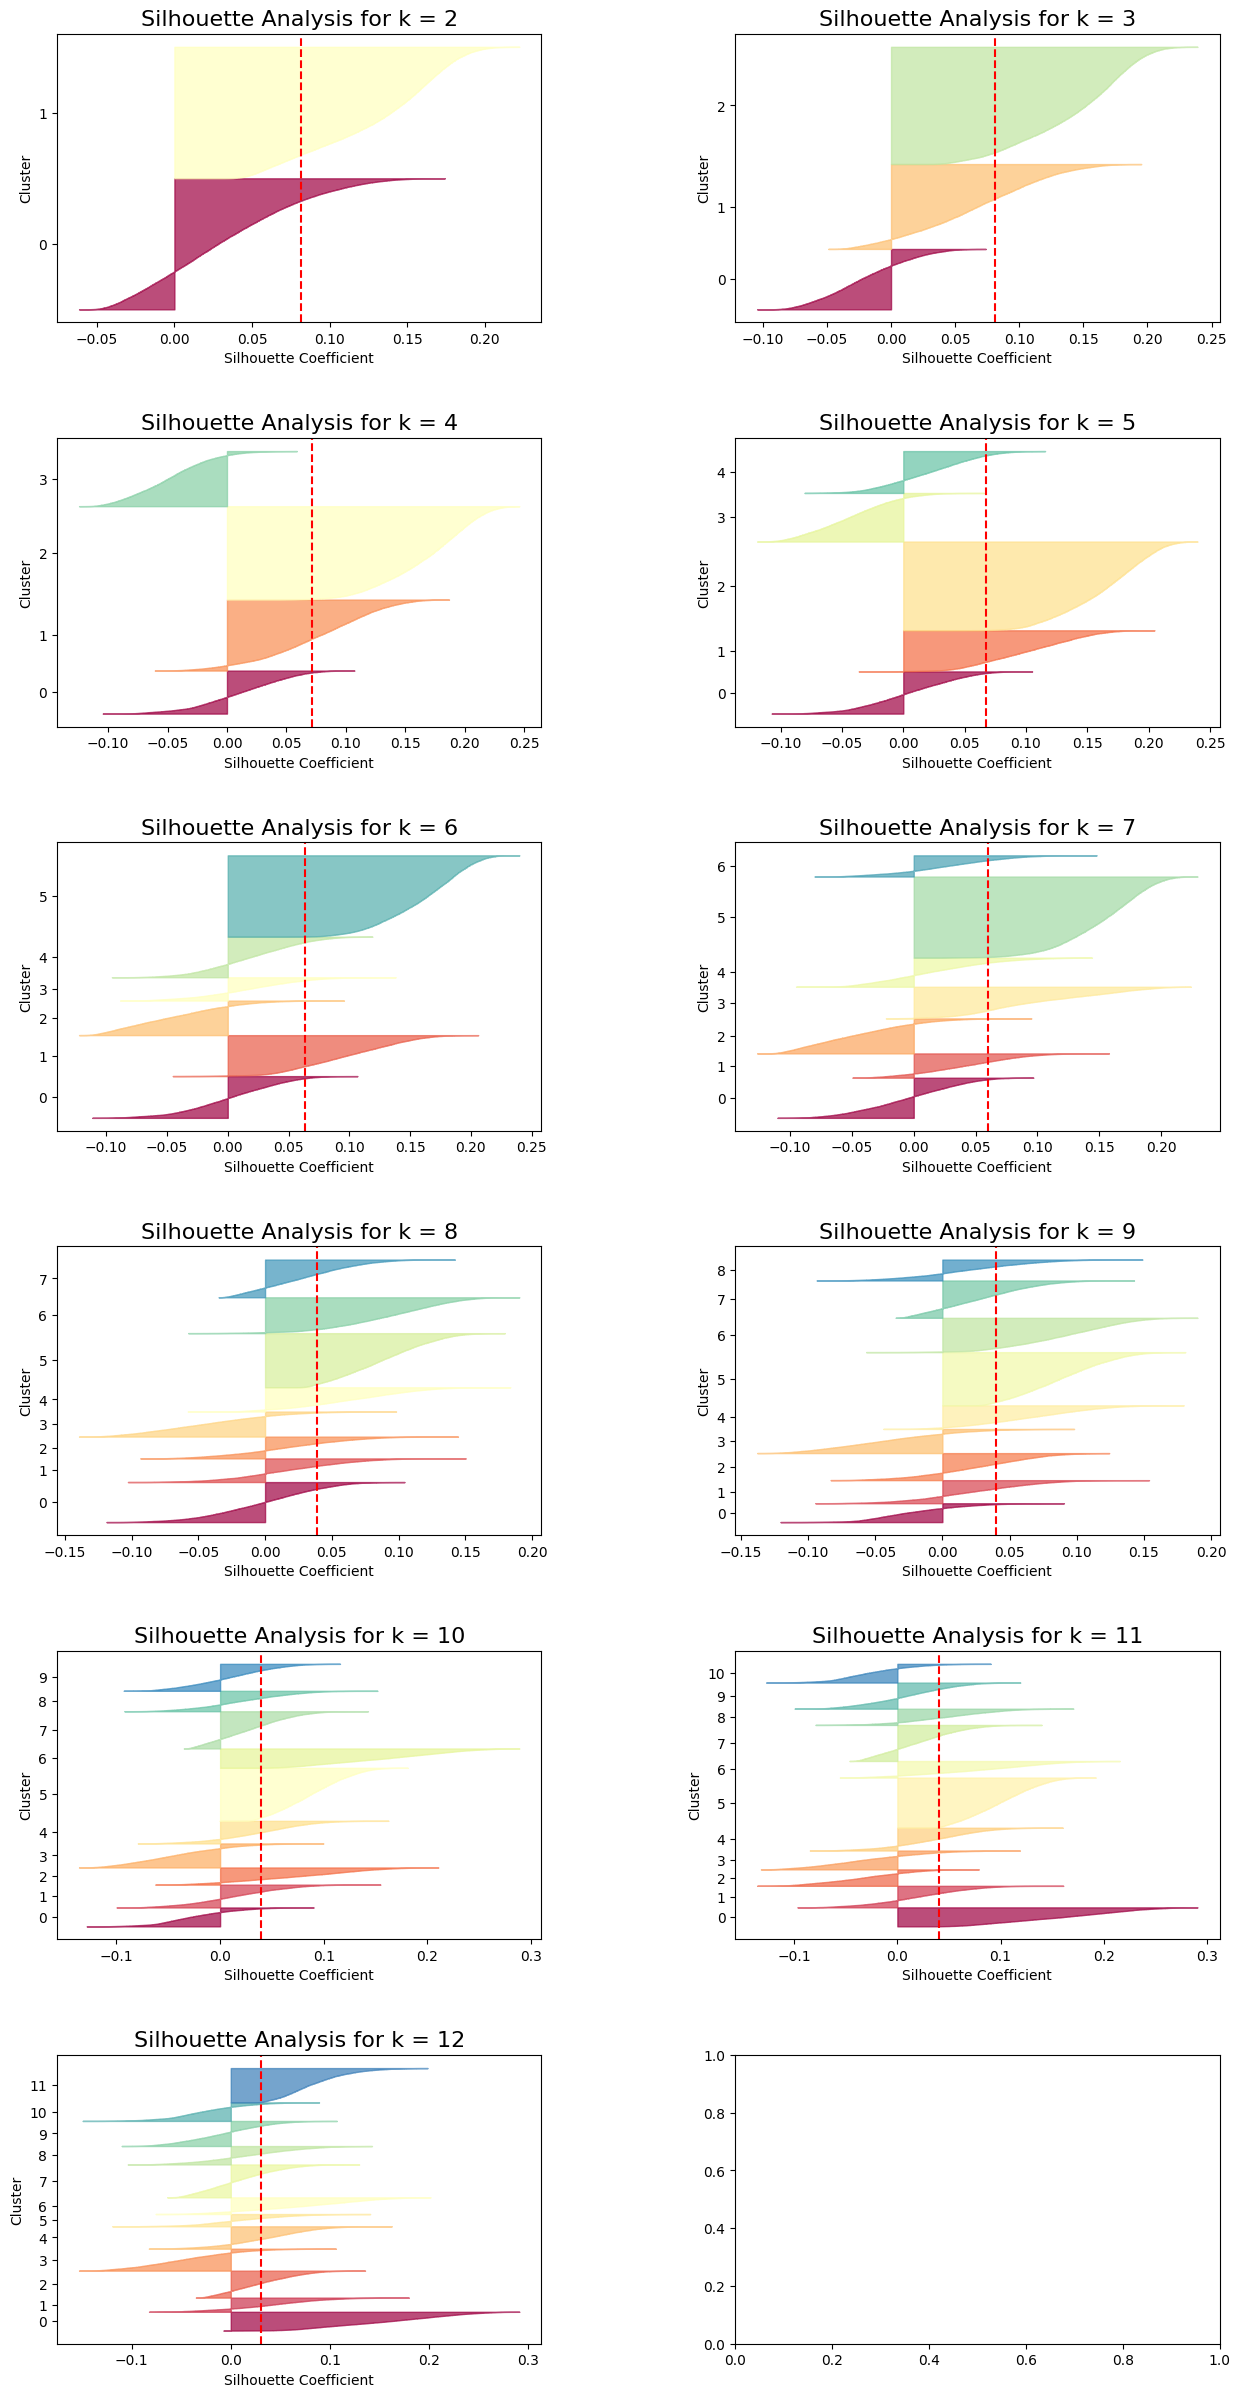

In [34]:
## Paso 7: Visualizar los Diagramas de Silueta
from sklearn.metrics import silhouette_samples, silhouette_score

def plot_silhouette_diagrams(data, range_k):
    fig, axs = plt.subplots(6, 2, figsize=(15, 30))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, k in enumerate(range_k):
        ax = axs[i // 2, i % 2]
        kmeans = KMeans(n_clusters=k, random_state=42)
        y_pred = kmeans.fit_predict(data)
        silhouette_coefficients = silhouette_samples(data, y_pred)

        silhouette_avg = silhouette_score(data, y_pred)
        ticks = []
        y_lower = 10

        for j in range(k):
            jth_cluster_silhouette_values = silhouette_coefficients[y_pred == j]
            jth_cluster_silhouette_values.sort()

            size_cluster_j = jth_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_j

            color = plt.cm.Spectral(j / k)
            ax.fill_betweenx(np.arange(y_lower, y_upper), 0, jth_cluster_silhouette_values,
                             facecolor=color, edgecolor=color, alpha=0.7)
            ticks.append((y_lower + y_upper) / 2)
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax.axvline(x=silhouette_avg, color="red", linestyle="--")
        ax.set_yticks(ticks)
        ax.set_yticklabels(range(k))
        ax.set_ylabel('Cluster')
        ax.set_xlabel('Silhouette Coefficient')
        ax.set_title(f'Silhouette Analysis for k = {k}', fontsize=16)

    plt.show()

# Rango de clusters a analizar
range_clusters = range(2, 13)

# Llamar a la función para visualizar los diagramas de silueta
plot_silhouette_diagrams(images_flat, range_clusters)

### 3. Aprendizaje Semi-Supervisado con K-Means


#### Paso 1: Cargar el Dataset con Etiquetas y Dividirlo en Conjuntos de Entrenamiento y Prueba

Se carga el dataset con etiquetas, se separan las características (X) de las etiquetas (y) y se divide el dataset en conjuntos de entrenamiento y prueba.



In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

# Cargar el dataset
mnist = pd.read_csv('train_data.csv')


# la columna 'label' es la etiqueta
X = mnist.iloc[:, 1:] # Todas las columnas excepto la primera
y = mnist['label']  # Suponiendo que 'label' es la etiqueta

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Paso 2: Escalar los Datos

- StandardScaler: Escala los datos para que tengan una media de 0 y una desviación estándar de 1. Es útil cuando los datos siguen una distribución aproximadamente normal.

- Normalización a [0, 1]: Es común para datos de imágenes, ya que los valores de píxeles están naturalmente en el rango [0, 255].

Para datos de imágenes, generalmente es mejor normalizar los datos al rango [0, 1] utilizando images_flat.astype(np.float32) / 255

In [149]:
X_train_scaled = X_train.astype(np.float32) / 255
X_test_scaled = X_test.astype(np.float32) / 255

print(X_train.shape)  

(45000, 784)


#### Paso 3: Entrenamiento del modelo KMeans



In [150]:
from sklearn.cluster import KMeans

# Utilizar el valor óptimo de k basado en el análisis de silueta
k = 11 # Según el análisis este valor puede cambiar en un rango de 10 a 12
kmeans = KMeans(n_clusters=k, random_state=42)        
X_digits_dist = kmeans.fit_transform(X_train)

fit_transform: Entrena el modelo K-Means con los datos de entrenamiento escalados y transforma los datos en distancias a los centroides de los clusters encontrados. Los resultados se almacenan en X_digits_dist.

#### Paso 4: Visualización de Imágenes Representativas
Ahora, visualizamos las imágenes más representativas de cada cluster:

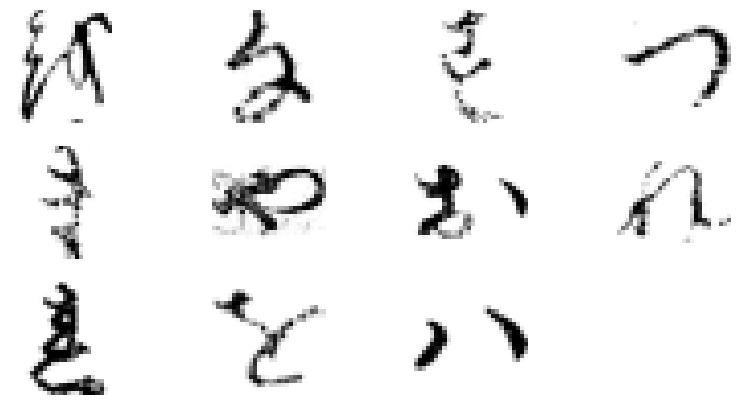

In [151]:
# Índices de las imágenes más cercanas a los centroides
idxs = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train.values[idxs]

# Mostrar las imágenes más representativas
plt.figure(figsize=(10, 5))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(3, 4, index+1)
    plt.imshow(X_representative_digit.reshape(28, 28), cmap="binary")
    plt.axis('off')
plt.show()


Explicación:

- Índices de Imágenes Representativas: np.argmin(X_digits_dist, axis=0) encuentra las imágenes más cercanas a cada centroide del cluster.

- Visualización: Muestra las imágenes más representativas de cada cluster en una cuadrícula.

#### Paso 5: Entrenamiento del Modelo de Clasificación
Ahora entrenamos un modelo de clasificación utilizando estas imágenes representativas y sus etiquetas:

In [152]:
from sklearn.linear_model import LogisticRegression

# Etiquetas de las imágenes representativas
y_representative_digits = y_train.values[idxs]

# Entrenar el modelo de clasificación
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)

# Evaluar el modelo
score = log_reg.score(X_test_scaled, y_test)
precision_percentage = score * 100
print(f'Precisión del modelo de clasificación con imágenes representativas: {precision_percentage:.2f}%')


Precisión del modelo de clasificación con imágenes representativas: 50.24%


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Logistic Regression: Entrena un modelo de regresión logística utilizando las imágenes representativas.

Evaluación: Evalúa el modelo en el conjunto de prueba e imprime la precisión.

### Paso 6: Entrenamiento del Modelo con Imágenes Aleatorias

- Imágenes Aleatorias: Entrena un modelo de regresión logística con 11 imágenes aleatorias del conjunto de entrenamiento y evalúa su precisión en el conjunto de prueba.

- Comparación: Esto permite comparar la eficacia de entrenar con imágenes representativas frente a imágenes aleatorias.

In [153]:
# Entrenamiento del modelo con 11 imágenes aleatorias
log_reg_random = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
%time log_reg_random.fit(X_train_scaled[:11], y_train[:11])
score_random = log_reg_random.score(X_test_scaled, y_test)
precision_random_percentage = score_random * 100
print(f'Precisión del modelo de clasificación con imágenes aleatorias: {precision_random_percentage:.2f}%')

CPU times: total: 0 ns
Wall time: 24.2 ms
Precisión del modelo de clasificación con imágenes aleatorias: 24.22%


#### Paso7: Asignación Automática de Etiquetas (Propagación de Etiquetas)



1. Concepto de Propagación de Etiquetas:

- Propagación: Asigna la etiqueta de la imagen representativa más cercana (el centroide del cluster) a todas las muestras que pertenecen al mismo cluster.
- Beneficio: Permite generar un conjunto de etiquetas extendido basado en un pequeño subconjunto de datos etiquetados, lo que es útil en contextos donde el etiquetado manual es costoso o laborioso.

- Iteración sobre los Clusters (k): Utiliza el valor optimal_k (obtenido del análisis de silueta) para iterar sobre los clusters y asignar etiquetas propagadas a todas las muestras en el conjunto de entrenamiento.

In [155]:
# Inicializa un array vacío del mismo tamaño que el conjunto de datos de entrenamiento (X_train).

# Propósito: Este array almacenará las etiquetas propagadas, es decir, 
# las etiquetas asignadas automáticamente a cada muestra de entrenamiento basada en los clusters formados por K-Means.
y_train_propagated = np.empty(len(X_train))


# Itera sobre cada cluster identificado por K-Means.
# kmeans.labels_ == i: Selecciona las muestras que pertenecen al cluster i
# Por ejemplo: Si i es 0, selecciona todas las muestras asignadas al primer cluster.

# y_representative_digits[i]: Obtiene la etiqueta de la imagen representativa del cluster i.
# Esta etiqueta fue asignada previamente a la imagen más representativa (el centroide) de cada cluster.
for i in range(k):
  y_train_propagated[kmeans.labels_== i] = y_representative_digits[i]

# y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]: 
# Asigna la etiqueta de la imagen representativa del cluster i a todas las muestras que pertenecen a ese cluster.

#Propósito: Asegurarse de que todas las muestras dentro de un mismo cluster tengan la misma etiqueta, basada en la etiqueta de la imagen más representativa de ese cluster.

Después de ejecutar el bucle, y_train_propagated contendrá las etiquetas propagadas para todas las muestras del conjunto de entrenamiento. Cada muestra tendrá la etiqueta de la imagen representativa del cluster al que pertenece.

#### Paso 8: Entrenamiento del Modelo con Etiquetas Propagadas

En este paso, utilizamos las etiquetas propagadas para entrenar un modelo de regresión logística.

In [156]:
# Proporción de datos a utilizar
proportion = 0.2  # 20%
num_samples = int(proportion * len(X_train))

# Entrenamiento de un modelo de regresión logística utilizando las etiquetas propagadas
log_reg_propagated = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=10000, random_state=42)

# 20% de 45k = 8000
# Utiliza las primeras 4000 muestras del conjunto de datos de entrenamiento (X_train_scaled[:4000]) y 
# sus etiquetas propagadas (y_train_propagated[:4000]).
log_reg_propagated.fit(X_train_scaled[:num_samples], y_train_propagated[:num_samples])

# Evaluamos el modelo en el conjunto de prueba (X_test_scaled y y_test) y muestra la precisión como un porcentaje.
score_propagated = log_reg_propagated.score(X_test_scaled, y_test)
precision_propagated_percentage = score_propagated * 100
print(f'Precisión del modelo de clasificación con etiquetas propagadas: {precision_propagated_percentage:.2f}%')


Precisión del modelo de clasificación con etiquetas propagadas: 60.76%


## 4. Aprendizaje Activo (Active Learning)

El aprendizaje activo es una técnica en la que el modelo de aprendizaje selecciona las muestras más informativas para ser etiquetadas manualmente. Este enfoque es útil cuando el etiquetado manual de datos es costoso y se desea maximizar la eficiencia del proceso de etiquetado.

Paso 1: Predicción de Probabilidades y Selección de Etiquetas con Baja Confianza

In [159]:
from sklearn.linear_model import LogisticRegression

def active_learning_iteration(X_train, y_train, y_train_propagated, X_test, y_test, k=11, iterations=10):
    log_reg_active = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)

    for iteration in range(iterations):
        # Entrenar el modelo con las etiquetas propagadas actuales
        log_reg_active.fit(X_train[:1000], y_train_propagated[:1000])
        
        # Obtener las probabilidades de predicción para el conjunto de entrenamiento
        probas = log_reg_active.predict_proba(X_train[:1000])
        labels_ixs = np.argmax(probas, axis=1)
        labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
        sorted_ixs = np.argsort(labels)

        # Seleccionar las muestras con las predicciones más inciertas
        X_lowest = X_train.iloc[:1000].iloc[sorted_ixs[:k]]
        y_lowest = y_train.iloc[:1000].iloc[sorted_ixs[:k]]

        # Actualizar las etiquetas propagadas con las etiquetas verdaderas de las muestras seleccionadas
        y_train_propagated[:1000][sorted_ixs[:k]] = y_lowest

        # Evaluar el modelo en el conjunto de prueba
        score = log_reg_active.score(X_test, y_test)
        precision_percentage = score * 100
        print(f"Iteración {iteration+1}/{iterations} - Precisión con aprendizaje activo: {precision_percentage:.2f}%")

    return log_reg_active

# Ejecutar aprendizaje activo en iteraciones
final_model = active_learning_iteration(X_train_scaled, y_train, y_train_propagated, X_test_scaled, y_test, k=11, iterations=10)


Iteración 1/10 - Precisión con aprendizaje activo: 60.00%
Iteración 2/10 - Precisión con aprendizaje activo: 60.20%
Iteración 3/10 - Precisión con aprendizaje activo: 60.17%
Iteración 4/10 - Precisión con aprendizaje activo: 59.83%
Iteración 5/10 - Precisión con aprendizaje activo: 59.98%
Iteración 6/10 - Precisión con aprendizaje activo: 59.98%
Iteración 7/10 - Precisión con aprendizaje activo: 59.98%
Iteración 8/10 - Precisión con aprendizaje activo: 59.98%
Iteración 9/10 - Precisión con aprendizaje activo: 59.98%
Iteración 10/10 - Precisión con aprendizaje activo: 59.98%


In [141]:
probas = log_reg_propagated.predict_proba(X_train[:8000])
labels_ixs = np.argmax(probas, axis=1)
labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)])
sorted_ixs = np.argsort(labels)
labels[sorted_ixs[:10]]

array([0.16666667, 0.16666667, 0.16666759, 0.19990241, 0.2       ,
       0.2       , 0.2       , 0.2       , 0.2       , 0.2       ])

### Explicación:

1. Predicción de Probabilidades:
- probas = log_reg3.predict_proba(X_train[:4000]): Calcula las probabilidades de pertenencia a cada clase para las primeras 4000 muestras del conjunto de entrenamiento utilizando el modelo entrenado.

2. Selección de Etiquetas con Mayor Probabilidad:
- labels_ixs = np.argmax(probas, axis=1): Selecciona las clases con la mayor probabilidad para cada muestra.
- labels = np.array([proba[ix] for proba, ix in zip(probas, labels_ixs)]): Extrae las probabilidades correspondientes a las clases seleccionadas.

3. Ordenar las Etiquetas por Confianza:
- sorted_ixs = np.argsort(labels): Ordena las muestras por su probabilidad, de menor a mayor.
- labels[sorted_ixs[:10]]: Selecciona las 10 muestras con menor confianza en la predicción.

#### Paso 2: Visualización de Imágenes con Baja Confianza

1. Seleccionar las Muestras con Baja Confianza:
- X_lowest = X_train.values[:4000][sorted_ixs[:k]]: Selecciona las muestras con las menores probabilidades (mayor incertidumbre).
2. Visualización de las Imágenes:
- Configurar la Visualización: Define el número de filas y columnas para la visualización.
- Crear Subplots: Muestra cada una de las imágenes con baja confianza en subplots.
- Mostrar la Figura: Visualiza las imágenes para identificar las muestras con mayor incertidumbre en las predicciones.

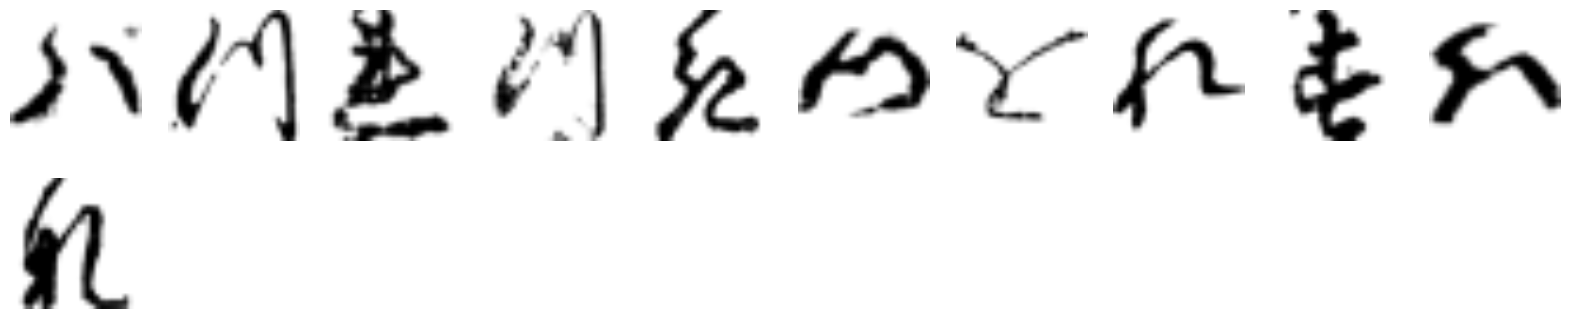

In [143]:
### Se seleccionan los primeros 4000 ejemplos y se orden de acuerdo a los índices de probabilidades de 
# mayor a menor
X_lowest = X_train.values[:8000][sorted_ixs[:k]]

# Definir k correctamente (número de imágenes a mostrar)
k = len(X_lowest)

# Calcular el número de filas y columnas
ncols = 10
nrows = k // ncols + (1 if k % ncols != 0 else 0)

# Crear la figura
plt.figure(figsize=(ncols * 2, nrows * 2))

# Crear subplots para cada imagen en X_lowest
for index, img in enumerate(X_lowest):
    plt.subplot(nrows, ncols, index + 1)
    plt.imshow(img.reshape(28, 28), cmap="binary", interpolation="bilinear")
    plt.axis('off')

# Mostrar la figura
plt.show()

#### Paso 3: Selección de Etiquetas Manuales
Selección de Etiquetas Reales:


In [144]:
y_lowest = y_train.values[:8000][sorted_ixs[:k]]
y_lowest


array([5, 3, 8, 3, 1, 3, 9, 8, 2, 5, 4], dtype=int64)

## Paso 4: Actualización de las Etiquetas Propagadas con Etiquetas Manuales

1. Copiar las Etiquetas Propagadas:
- y_train2 = y_train_propagated[:8000].copy(): Crea una copia de las etiquetas propagadas para las primeras 4000 muestras.
2. Actualizar con Etiquetas Manuales:
- y_train2[sorted_ixs[:k]] = y_lowest: Reemplaza las etiquetas propagadas con las etiquetas reales obtenidas manualmente para las muestras seleccionadas.

In [145]:
#Copiar las Etiquetas Propagadas:
y_train2 = y_train_propagated[:8000].copy()

# Actualizar con Etiquetas Manuales:
y_train2[sorted_ixs[:k]] = y_lowest

#### Paso 5: Reentrenamiento del Modelo con las Etiquetas Actualizadas
Después de actualizar las etiquetas, se reentrena el modelo de regresión logística utilizando estas nuevas etiquetas. Esto mejora el modelo al basarse en etiquetas más precisas para las muestras más difíciles de clasificar.

In [147]:
log_reg5 = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=20000, random_state=42)
%time log_reg5.fit(X_train[:8000], y_train2)
log_reg5.score(X_test, y_test)

CPU times: total: 4min 13s
Wall time: 2min 48s


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5638